In [ ]:
import pandas as pd
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from gensim.parsing.preprocessing import remove_stopwords

from sklearn.svm import SVC

from matplotlib import pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
english_model = spacy.load('en_core_web_sm')
mstopwords = english_model.Defaults.stop_words


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ministopwords = stopwords.words('english')

In [ ]:
finalstopwords = mstopwords
for i in mstopwords:
  for j in ministopwords:
    if i!=j:
      finalstopwords.add(j)

RuntimeError: ignored

In [ ]:
print(len(finalstopwords))
print(finalstopwords)

NameError: ignored

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fake news dataset/train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Analysis of Dataset

In [ ]:
print(len(data[data.label==0]), len(data[data.label==1]))

10387 10413


Text(0, 0.5, 'No. Of Instances')

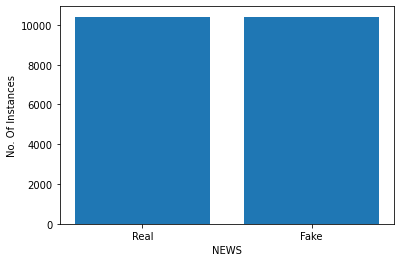

In [ ]:
real_and_fake = [len(data[data.label==0]), len(data[data.label==1])]
plt.bar(["Real", "Fake"],real_and_fake)
plt.xlabel("NEWS")
plt.ylabel("No. Of Instances")

In [ ]:
data.shape

(20800, 5)

In [ ]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
data.fillna('', inplace =True)

In [ ]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
simple_X = data['author']+ ' '+ data['title']+ ' ' + data['text']
simple_Y = data['label']

In [ ]:
X = data['author']+ ' '+ data['title']+ ' ' + data['text']
Y = data['label']

Removing stopwords

In [ ]:
X= X.apply(lambda x: remove_stopwords(x))

Remove Punctuations

In [ ]:
def removePunctuation(X):
  newX =[]
  for line in X:
    line = res = re.sub(r'[^\w\s]', '', line)
    newX.append(line)
  return newX



In [ ]:
X = removePunctuation(X)

Stemming words

In [ ]:
def stemming(X):
  mystem = PorterStemmer()
  newX =[]
  for line in X:
    line = line.split()
    newdataline=[]
    for words in line:
      words = mystem.stem(words)
      newdataline.append(words)
    newdataline = ' '.join(newdataline)  
    newX.append(newdataline)
  return newX

In [ ]:
X = stemming(X)

lemmatization function

In [ ]:
def lematizer(X):
  nltk.download('wordnet')
  mylemitizer = WordNetLemmatizer()
  newX =[]
  for line in X:
    line = line.split()
    newdataline=[]
    for words in line:
      words = mylemitizer.lemmatize(words)
      newdataline.append(words)
    newdataline = ' '.join(newdataline)  
    newX.append(newdataline)
  return newX

In [ ]:
X = lematizer(X)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Analysis of the Dataset after removing stopwords, punctuation, and apllying lematization

In [ ]:
#vocabulary size
FakeCountVocab =0
RealCountVocab =0
uniqueFakeCount =[]
uniqueRealCount =[]
for i in range(len(X)):
  line = X[i].split()
  label = Y[i]
  if label==0:
    for j in line:
      if j not in uniqueRealCount:
        uniqueRealCount.append(j)
        RealCountVocab+=1
  if label==1:
    for j in line:
      if j not in uniqueFakeCount:
        uniqueFakeCount.append(j)
        FakeCountVocab+=1      
    

In [ ]:
print(FakeCountVocab, RealCountVocab)

155223 94035


In [ ]:
uniqueRealCount

In [ ]:
uniqueFakeCount

In [ ]:
#Avg. no. of words per news
noOfFakeNews = len(data[data.label==1])
noOfRealNews = len(data[data.label==0])

avgFakeCountWords = FakeCountVocab/noOfFakeNews
avgRealCountWords = RealCountVocab/noOfRealNews


In [ ]:
print(avgFakeCountWords,avgRealCountWords)

14.906655142610198 9.053143352267258


WordCloud

In [ ]:
fakeText = " "
realText = " "
for i in range(len(X)):
  line = X[i].split();
  if(Y[i]==1):
    fakeText += " ".join(line)
  else:
    realText += " ".join(line)

fakeCloud = WordCloud(width=1000, height=1000, background_color='white').generate(fakeText)
realCloud = WordCloud(width=1000, height=1000, background_color='white').generate(realText)


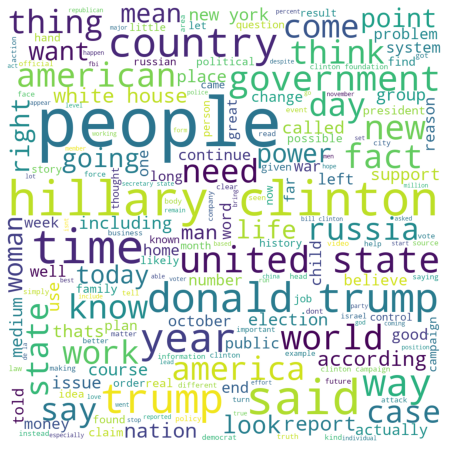

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(fakeCloud)
plt.axis("off")
plt.show()

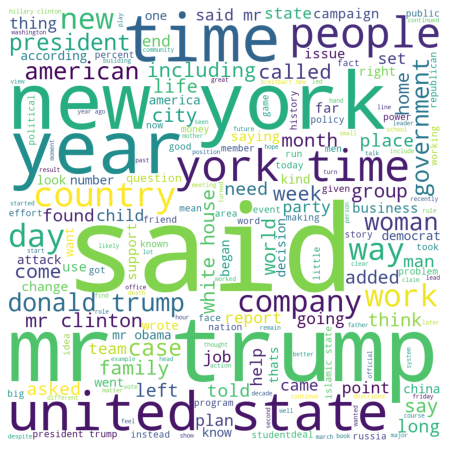

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(realCloud)
plt.axis("off")
plt.show()

In [ ]:
def myLogisticRegression(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  mymodel = LogisticRegression()
  mymodel.fit(X_train,Y_train)
  y_prediction  = mymodel.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
logistic_regression_accuracy =[]
for i in range(1,5):
  accuracy = myLogisticRegression(i,10000)
  logistic_regression_accuracy.append(accuracy)

for 1 gram
[[   4 3112]
 [  11 3113]]
              precision    recall  f1-score   support

           0       0.27      0.00      0.00      3116
           1       0.50      1.00      0.67      3124

    accuracy                           0.50      6240
   macro avg       0.38      0.50      0.33      6240
weighted avg       0.38      0.50      0.33      6240

for 2 gram
[[ 224 2892]
 [ 120 3004]]
              precision    recall  f1-score   support

           0       0.65      0.07      0.13      3116
           1       0.51      0.96      0.67      3124

    accuracy                           0.52      6240
   macro avg       0.58      0.52      0.40      6240
weighted avg       0.58      0.52      0.40      6240

for 3 gram
[[ 429 2687]
 [ 172 2952]]
              precision    recall  f1-score   support

           0       0.71      0.14      0.23      3116
           1       0.52      0.94      0.67      3124

    accuracy                           0.54      6240
   macro avg  

In [ ]:
logistic_regression_accuracy = [i*100 for i in logistic_regression_accuracy]
logistic_regression_accuracy

[50.416666666666664, 54.48717948717948, 51.93910256410257, 63.717948717948715]

In [ ]:
def mySGDC(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  sgdmodel = SGDClassifier()
  sgdmodel.fit(X_train,Y_train)
  y_prediction  = sgdmodel.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
sgdc_accuracy =[]
for i in range(1,5):
  accuracy = mySGDC(i,5000)
  sgdc_accuracy.append(accuracy)

for 1 gram
[[ 462 2654]
 [ 240 2884]]
              precision    recall  f1-score   support

           0       0.66      0.15      0.24      3116
           1       0.52      0.92      0.67      3124

    accuracy                           0.54      6240
   macro avg       0.59      0.54      0.45      6240
weighted avg       0.59      0.54      0.45      6240

for 2 gram
[[1700 1416]
 [ 421 2703]]
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      3116
           1       0.66      0.87      0.75      3124

    accuracy                           0.71      6240
   macro avg       0.73      0.71      0.70      6240
weighted avg       0.73      0.71      0.70      6240

for 3 gram
[[ 656 2460]
 [ 175 2949]]
              precision    recall  f1-score   support

           0       0.79      0.21      0.33      3116
           1       0.55      0.94      0.69      3124

    accuracy                           0.58      6240
   macro avg  

In [ ]:
sgdc_accuracy = [i*100 for i in sgdc_accuracy]

In [ ]:
sgdc_accuracy

[53.62179487179487, 70.56089743589745, 57.77243589743589, 57.53205128205128]

In [ ]:
def myDecisionTree(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  decisiontreeclassifier = DecisionTreeClassifier()
  decisiontreeclassifier.fit(X_train,Y_train)
  y_prediction  = decisiontreeclassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
decisiontreeclassifier_accuracy =[]
for i in range(1,5):
  accuracy = myDecisionTree(i,5000)
  decisiontreeclassifier_accuracy.append(accuracy)

for 1 gram
[[1235 1881]
 [ 685 2439]]
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      3116
           1       0.56      0.78      0.66      3124

    accuracy                           0.59      6240
   macro avg       0.60      0.59      0.57      6240
weighted avg       0.60      0.59      0.57      6240

for 2 gram
[[1984 1132]
 [ 638 2486]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      3116
           1       0.69      0.80      0.74      3124

    accuracy                           0.72      6240
   macro avg       0.72      0.72      0.71      6240
weighted avg       0.72      0.72      0.71      6240

for 3 gram
[[ 614 2502]
 [ 366 2758]]
              precision    recall  f1-score   support

           0       0.63      0.20      0.30      3116
           1       0.52      0.88      0.66      3124

    accuracy                           0.54      6240
   macro avg  

In [ ]:
decisiontreeclassifier_accuracy = [i*100 for i in decisiontreeclassifier_accuracy]

In [ ]:
decisiontreeclassifier_accuracy

[58.87820512820513, 71.63461538461539, 54.03846153846153, 59.55128205128205]

In [ ]:
from sklearn.metrics import f1_score 

In [ ]:
def mySVMClassifier(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  svmclassifier = SVC()
  svmclassifier.fit(X_train, Y_train)
  y_prediction  = svmclassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction),f1_score(Y_test, y_prediction)

In [ ]:
svmclassifier_accuracy =[]
svmclassifier_f1_score =[]
for i in range(1,5):
  accuracy,f1Score = mySVMClassifier(i,5000)
  svmclassifier_accuracy.append(accuracy)
  svmclassifier_f1_score.append(f1Score)

for 1 gram
[[ 977 2139]
 [ 272 2852]]
              precision    recall  f1-score   support

           0       0.78      0.31      0.45      3116
           1       0.57      0.91      0.70      3124

    accuracy                           0.61      6240
   macro avg       0.68      0.61      0.58      6240
weighted avg       0.68      0.61      0.58      6240

for 2 gram
[[ 927 2189]
 [ 207 2917]]
              precision    recall  f1-score   support

           0       0.82      0.30      0.44      3116
           1       0.57      0.93      0.71      3124

    accuracy                           0.62      6240
   macro avg       0.69      0.62      0.57      6240
weighted avg       0.69      0.62      0.57      6240

for 3 gram
[[ 489 2627]
 [ 123 3001]]
              precision    recall  f1-score   support

           0       0.80      0.16      0.26      3116
           1       0.53      0.96      0.69      3124

    accuracy                           0.56      6240
   macro avg  

In [ ]:
svmclassifier_accuracy=[i*100 for i in svmclassifier_accuracy]

In [ ]:
svmclassifier_accuracy 

[61.36217948717949, 61.6025641025641, 55.92948717948718, 54.32692307692307]

In [ ]:
svmclassifier_f1_score 

[0.7028958718422674, 0.7088699878493318, 0.6857861060329068, 0.680278214045322]

In [ ]:
def myKNNClassifier(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  knnclassifier = KNeighborsClassifier(n_neighbors=5)
  knnclassifier.fit(X_train, Y_train)
  y_prediction  = knnclassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
knnclassifier_accuracy =[]
for i in range(1,5):
  accuracy = myKNNClassifier(i,5000)
  knnclassifier_accuracy.append(accuracy)


for 1 gram
[[   4 3112]
 [   5 3119]]
              precision    recall  f1-score   support

           0       0.44      0.00      0.00      3116
           1       0.50      1.00      0.67      3124

    accuracy                           0.50      6240
   macro avg       0.47      0.50      0.33      6240
weighted avg       0.47      0.50      0.34      6240

for 2 gram
[[ 235 2881]
 [  33 3091]]
              precision    recall  f1-score   support

           0       0.88      0.08      0.14      3116
           1       0.52      0.99      0.68      3124

    accuracy                           0.53      6240
   macro avg       0.70      0.53      0.41      6240
weighted avg       0.70      0.53      0.41      6240

for 3 gram
[[ 142 2974]
 [  93 3031]]
              precision    recall  f1-score   support

           0       0.60      0.05      0.08      3116
           1       0.50      0.97      0.66      3124

    accuracy                           0.51      6240
   macro avg  

In [ ]:
knnclassifier_accuracy = [i*100 for i in knnclassifier_accuracy]

In [ ]:
knnclassifier_accuracy

[50.04807692307692, 53.30128205128205, 50.84935897435897, 57.49999999999999]

In [ ]:
def myRFClassifier(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  myRFclassifier = RandomForestClassifier(n_estimators=500)
  myRFclassifier.fit(X_train, Y_train)
  y_prediction  =  myRFclassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction),f1_score(Y_test, y_prediction)

In [ ]:
RFclassifier_accuracy =[]
RFclassifier_f1_score =[]
for i in range(1,5):
  accuracy,f1Score = myRFClassifier(i,5000)
  RFclassifier_accuracy.append(accuracy)
  RFclassifier_f1_score.append(f1Score)

for 1 gram
[[1117 1999]
 [  48 3076]]
              precision    recall  f1-score   support

           0       0.96      0.36      0.52      3116
           1       0.61      0.98      0.75      3124

    accuracy                           0.67      6240
   macro avg       0.78      0.67      0.64      6240
weighted avg       0.78      0.67      0.64      6240

for 2 gram
[[ 679 2437]
 [ 251 2873]]
              precision    recall  f1-score   support

           0       0.73      0.22      0.34      3116
           1       0.54      0.92      0.68      3124

    accuracy                           0.57      6240
   macro avg       0.64      0.57      0.51      6240
weighted avg       0.64      0.57      0.51      6240

for 3 gram
[[ 400 2716]
 [ 163 2961]]
              precision    recall  f1-score   support

           0       0.71      0.13      0.22      3116
           1       0.52      0.95      0.67      3124

    accuracy                           0.54      6240
   macro avg  

In [ ]:
RFclassifier_accuracy = [i*100 for i in RFclassifier_accuracy]

In [ ]:
RFclassifier_accuracy 

[67.19551282051283, 56.92307692307692, 53.86217948717948, 52.035256410256416]

In [ ]:
RFclassifier_f1_score

[0.7503354067569216,
 0.6812900165994782,
 0.6728780820361323,
 0.6705558613098513]

In [ ]:
def myMLPClassifier(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train)
  X_test = myvectorizer.fit_transform(X_test)
  myMLPClassifier = MLPClassifier(random_state=1, max_iter=300)
  myMLPClassifier.fit(X_train, Y_train)
  y_prediction  =  myMLPClassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
mlpclassifier_accuracy =[]
for i in range(1,5):
  accuracy = myMLPClassifier(i,5000)
  mlpclassifier_accuracy.append(accuracy)

for 1 gram
[[1168 1948]
 [ 796 2328]]
              precision    recall  f1-score   support

           0       0.59      0.37      0.46      3116
           1       0.54      0.75      0.63      3124

    accuracy                           0.56      6240
   macro avg       0.57      0.56      0.54      6240
weighted avg       0.57      0.56      0.54      6240

for 2 gram
[[2017 1099]
 [1031 2093]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      3116
           1       0.66      0.67      0.66      3124

    accuracy                           0.66      6240
   macro avg       0.66      0.66      0.66      6240
weighted avg       0.66      0.66      0.66      6240

for 3 gram
[[1597 1519]
 [ 722 2402]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      3116
           1       0.61      0.77      0.68      3124

    accuracy                           0.64      6240
   macro avg  

In [ ]:
mlpclassifier_accuracy = [i*100 for i in mlpclassifier_accuracy]

In [ ]:
mlpclassifier_accuracy 

[56.02564102564103, 65.86538461538461, 64.08653846153847, 61.570512820512825]

In [ ]:
def myNaiveBayes(gram,features):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=124)
  myvectorizer = TfidfVectorizer(max_features=features,ngram_range=(gram, gram))
  X_train = myvectorizer.fit_transform(X_train).toarray()
  X_test = myvectorizer.fit_transform(X_test).toarray()
  myNaiveBayesClassifier = MultinomialNB()
  myNaiveBayesClassifier.fit(X_train, Y_train)
  y_prediction  =  myNaiveBayesClassifier.predict(X_test)
  print("for {0} gram".format(gram))
  print(metrics.confusion_matrix(Y_test, y_prediction))
  print(metrics.classification_report(Y_test, y_prediction))
  return accuracy_score(Y_test, y_prediction)

In [ ]:
naivebayesclassifier_accuracy =[]
for i in range(1,5):
  accuracy = myNaiveBayes(i,5000)
  naivebayesclassifier_accuracy.append(accuracy)

for 1 gram
[[1370 1746]
 [1023 2101]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50      3116
           1       0.55      0.67      0.60      3124

    accuracy                           0.56      6240
   macro avg       0.56      0.56      0.55      6240
weighted avg       0.56      0.56      0.55      6240

for 2 gram
[[2220  896]
 [1422 1702]]
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      3116
           1       0.66      0.54      0.59      3124

    accuracy                           0.63      6240
   macro avg       0.63      0.63      0.63      6240
weighted avg       0.63      0.63      0.63      6240

for 3 gram
[[1569 1547]
 [ 719 2405]]
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      3116
           1       0.61      0.77      0.68      3124

    accuracy                           0.64      6240
   macro avg  

In [ ]:
naivebayesclassifier_accuracy = [i*100 for i in naivebayesclassifier_accuracy]

In [ ]:
naivebayesclassifier_accuracy

[55.625, 62.8525641025641, 63.68589743589743, 60.03205128205128]

plotting analysis

In [ ]:
myClassifier = ["LR","SGDC","DT", "SVM","MLP","RF","NB","KNN"]
unigram=[]
bigram=[]
trigram=[]
fourgram=[]
for i in range(4):
  if i==0:
    unigram.extend([logistic_regression_accuracy[i],sgdc_accuracy[i],decisiontreeclassifier_accuracy[i],svmclassifier_accuracy[i],mlpclassifier_accuracy[i],RFclassifier_accuracy[i],naivebayesclassifier_accuracy[i],knnclassifier_accuracy[i]])
  if i==1: 
    bigram.extend([logistic_regression_accuracy[i],sgdc_accuracy[i],decisiontreeclassifier_accuracy[i],svmclassifier_accuracy[i],mlpclassifier_accuracy[i],RFclassifier_accuracy[i],naivebayesclassifier_accuracy[i],knnclassifier_accuracy[i]])
  if i==2:
    trigram.extend([logistic_regression_accuracy[i],sgdc_accuracy[i],decisiontreeclassifier_accuracy[i],svmclassifier_accuracy[i],mlpclassifier_accuracy[i],RFclassifier_accuracy[i],naivebayesclassifier_accuracy[i],knnclassifier_accuracy[i]])
  if i==3:
    fourgram.extend([logistic_regression_accuracy[i],sgdc_accuracy[i],decisiontreeclassifier_accuracy[i],svmclassifier_accuracy[i],mlpclassifier_accuracy[i],RFclassifier_accuracy[i],naivebayesclassifier_accuracy[i],knnclassifier_accuracy[i]])    

  

Unigram analysis

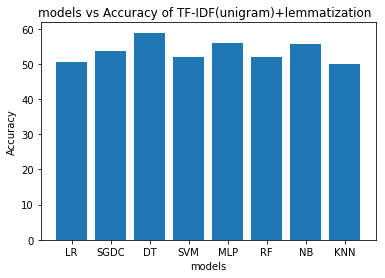

In [ ]:
plt.bar(myClassifier, unigram)
plt.title("models vs Accuracy of TF-IDF(unigram)+lemmatization  ")
plt.xlabel("models")
plt.ylabel("Accuracy")
plt.show()


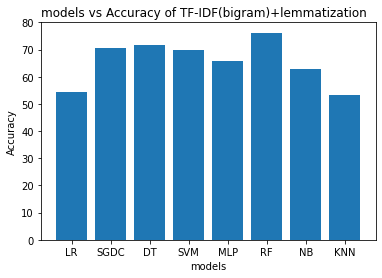

In [ ]:
plt.bar(myClassifier, bigram)
plt.title("models vs Accuracy of TF-IDF(bigram)+lemmatization  ")
plt.xlabel("models")
plt.ylabel("Accuracy")
plt.show()

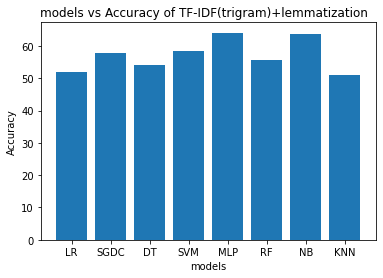

In [ ]:
plt.bar(myClassifier, trigram)
plt.title("models vs Accuracy of TF-IDF(trigram)+lemmatization  ")
plt.xlabel("models")
plt.ylabel("Accuracy")
plt.show()

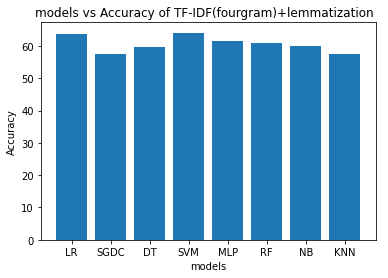

In [ ]:
plt.bar(myClassifier, fourgram)
plt.title("models vs Accuracy of TF-IDF(fourgram)+lemmatization  ")
plt.xlabel("models")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/ML Project - Fake news Detection /Code_And_Data/fake-news/test.csv')

In [ ]:
data2.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
data2.fillna('', inplace=True)
X2 = data2['author']+ data2['title'] + data2['text']


In [ ]:
X2 = myvectorizer.fit_transform(X2)

In [ ]:
y_prediction  = mymodel.predict(X2)


In [ ]:
y_prediction[1:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])